### Importy bibliotek

In [84]:
import pandas as pd

import ipywidgets as widgets
from IPython.display import display, Math, Latex, Markdown
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib
import time
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn.objects as so

### Wczytywanie danych

In [85]:
DATA_PATH = './data/'

#all
races = pd.read_csv(DATA_PATH + 'races.csv', usecols=['raceId', 'year'])
results = pd.read_csv(DATA_PATH + 'results.csv', usecols=['raceId', 'driverId', 'constructorId'])

#Bar plot
drivers = pd.read_csv(DATA_PATH + 'drivers.csv', usecols=['driverId', 'nationality'])
driver_standings = pd.read_csv(DATA_PATH + 'driver_standings.csv', usecols=['driverId', 'wins'])

#Pie plot
constructors = pd.read_csv(DATA_PATH + 'constructors.csv', usecols=['constructorId', 'name'])
constructor_standings = pd.read_csv(DATA_PATH + 'constructor_standings.csv', usecols=['constructorId', 'wins'])

### Wykres słupkowy | Liczba kierowców z Top 10 narodowości

In [86]:
nationality_counts = drivers.groupby("nationality").size()
sorted_nationalities = nationality_counts.sort_values(ascending=False)
top_10_nationalities = sorted_nationalities.iloc[:10]

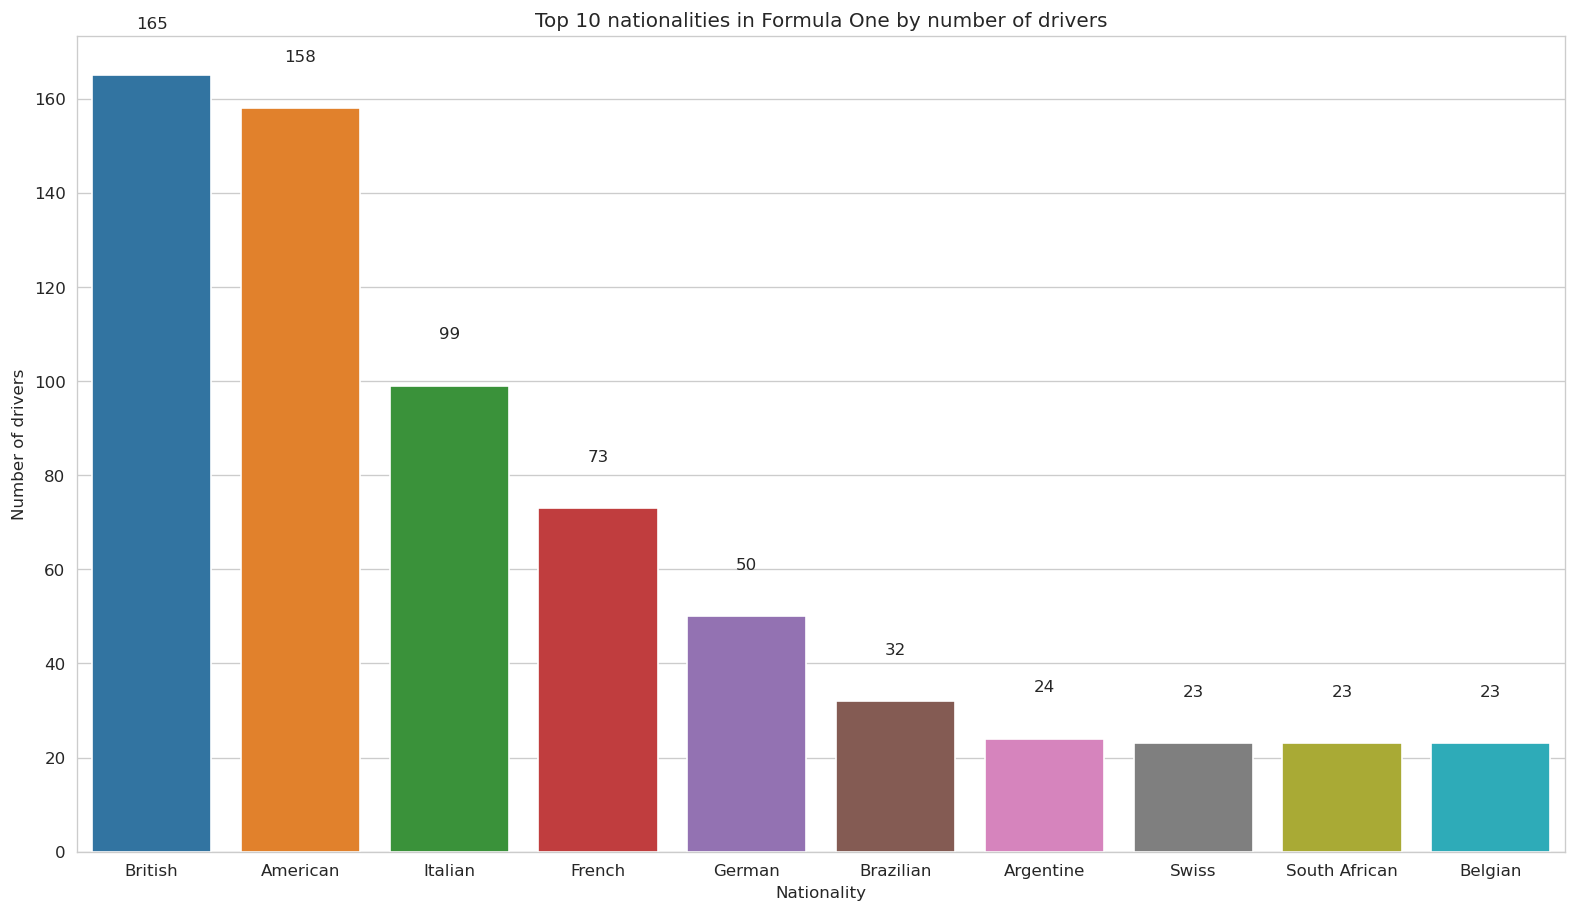

In [98]:
x_values = top_10_nationalities.index
y_values = top_10_nationalities.values

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16, 9),dpi=120)
sns.barplot(x=x_values, y=y_values, ax=ax)
ax.set_title("Top 10 nationalities in Formula One by number of drivers")
ax.set_xlabel("Nationality")
ax.set_ylabel("Number of drivers")
for i, v in enumerate(y_values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=10)

plt.show()

### Wykres kołowy | Najbardziej utytułowane zespoły w historii pod względem wygranych wyścigów (miejsc na podium)

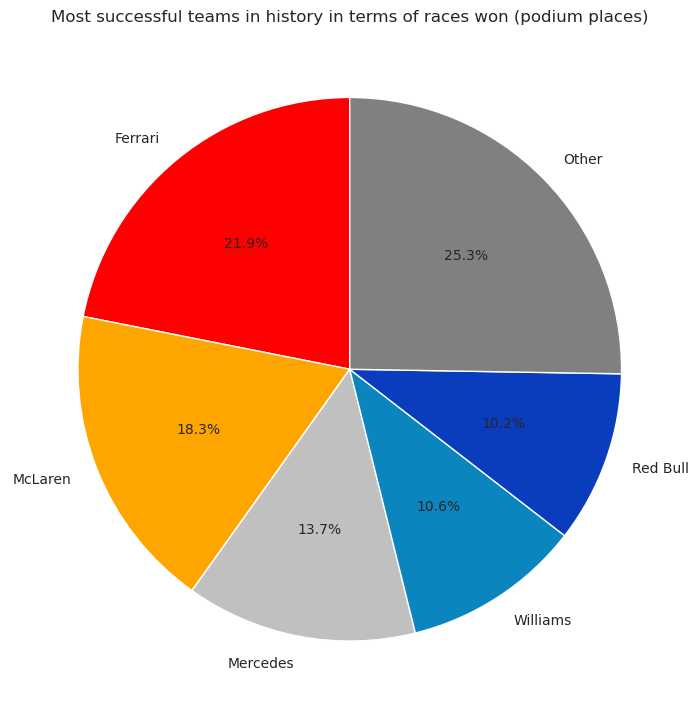

In [93]:
constructor_wins = constructor_standings[constructor_standings['wins'] != 0]
data = pd.merge(constructors, constructor_wins, on='constructorId')

win_counts = data.groupby('name')['wins'].sum()

top_constructors = win_counts.nlargest(5).index.tolist()
win_counts_top = win_counts.loc[top_constructors]
other_wins = win_counts.sum() - win_counts_top.sum()
win_counts_top['Other'] = other_wins
top_constructors.append('Other')

color_dict = {'Ferrari': 'red', 'McLaren': 'orange', 'Mercedes': 'silver', 'Williams': '#0a85bd',
                'Red Bull': '#0a3dbd', 'Brabham': '#ffce4b', 'Team Lotus': 'green', 'Renault': 'yellow', 'BRM': '#cc00cc', 'Tyrrell': 'pink', 'Other': 'gray'}

colors = win_counts_top.index.map(color_dict.get)


sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16, 9), dpi=100)
ax.pie(win_counts_top, labels=top_constructors, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Most successful teams in history in terms of races won (podium places)')

plt.show()

### Pitstops

In [89]:
#read csv
pitstops = pd.read_csv("data/pit_stops.csv")
races = pd.read_csv("data/races.csv")
races_1950 = races.loc[races["year"] == 2023]

# display(Markdown("## Pitstops"))
# display(pitstops.head(5))

# display(Markdown("## races"))
# display(races.head(5))

# display(Markdown("## races 1950"))
# display(races_1950)

# display(Markdown(" ---"))

# # print(sorted(years:= races["year"].unique()))
# race_id_year = races_1950["raceId"]
# display(race_id_year)
# display(Markdown(" ---"))

# pitstops_in_year = pitstops[pitstops["raceId"].isin([841,848])]
# display(pitstops_in_year)
# display(pitstops.loc[pitstops["raceId"]==1094])

---

### Boxplot


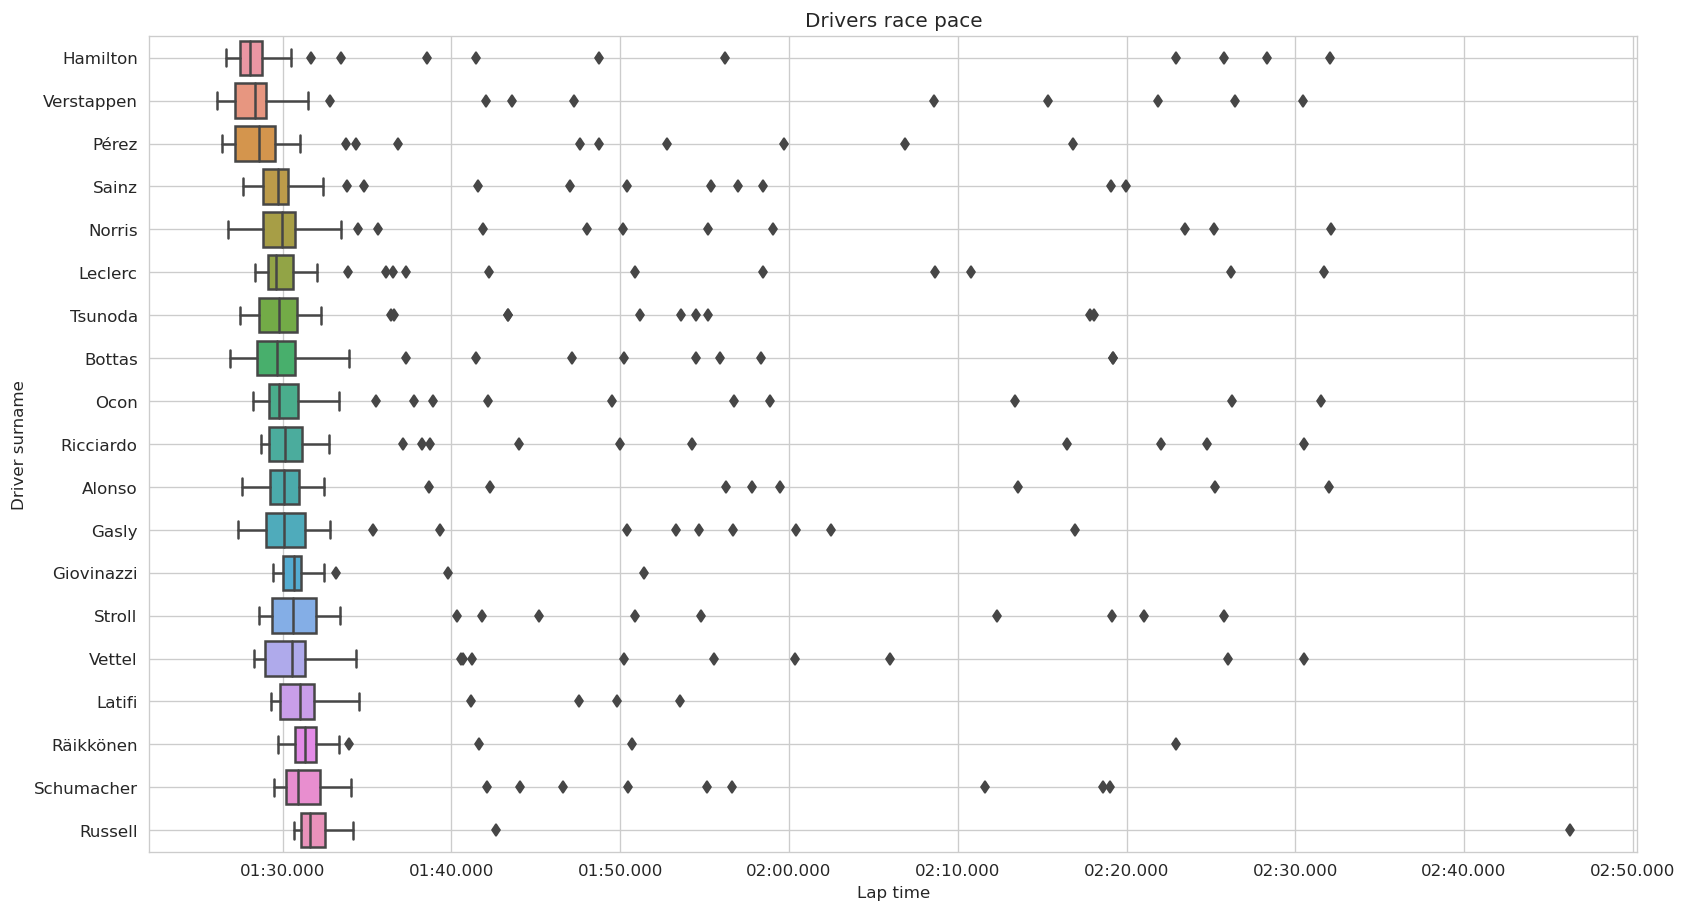

In [90]:

lap_times_df = pd.read_csv("data/lap_times.csv")
drivers_df = pd.read_csv("data/drivers.csv")

# Abu Dhabi Grand Prix 2021


df_boxplot = lap_times_df.loc[lap_times_df["raceId"]==1073]
df_boxplot = df_boxplot[["driverId","time","milliseconds"]]





df_boxplot = pd.merge(df_boxplot,drivers_df[["driverId","surname"]],on="driverId")

driver_names = df_boxplot["surname"].unique().tolist()
boxplot_res = pd.DataFrame()
for driver in driver_names:
    driver_data = df_boxplot.loc[df_boxplot["surname"]==driver].sort_values(by="milliseconds")
    boxplot_res = pd.concat([boxplot_res,driver_data])

df_boxplot = df_boxplot

fig, ax = plt.subplots(figsize=(16, 9), dpi=120)
boxplot = sns.boxplot(data=boxplot_res,x="milliseconds",y="surname",orient="h")
formatter = matplotlib.ticker.FuncFormatter(lambda ms,_: time.strftime(f'%M:%S.000', time.gmtime(ms/1000)))
ax.xaxis.set_major_formatter(formatter)

ax.grid(True)
ax.set_xlabel("Lap time")
ax.set_ylabel("Driver surname")
ax.set_title("Drivers race pace")
plt.show()


/tmp/ipykernel_9831/3884127103.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ham_ver_results.loc[ham_ver_results["driverId"] == 1, "Name"] = "Lewis Hamilton"


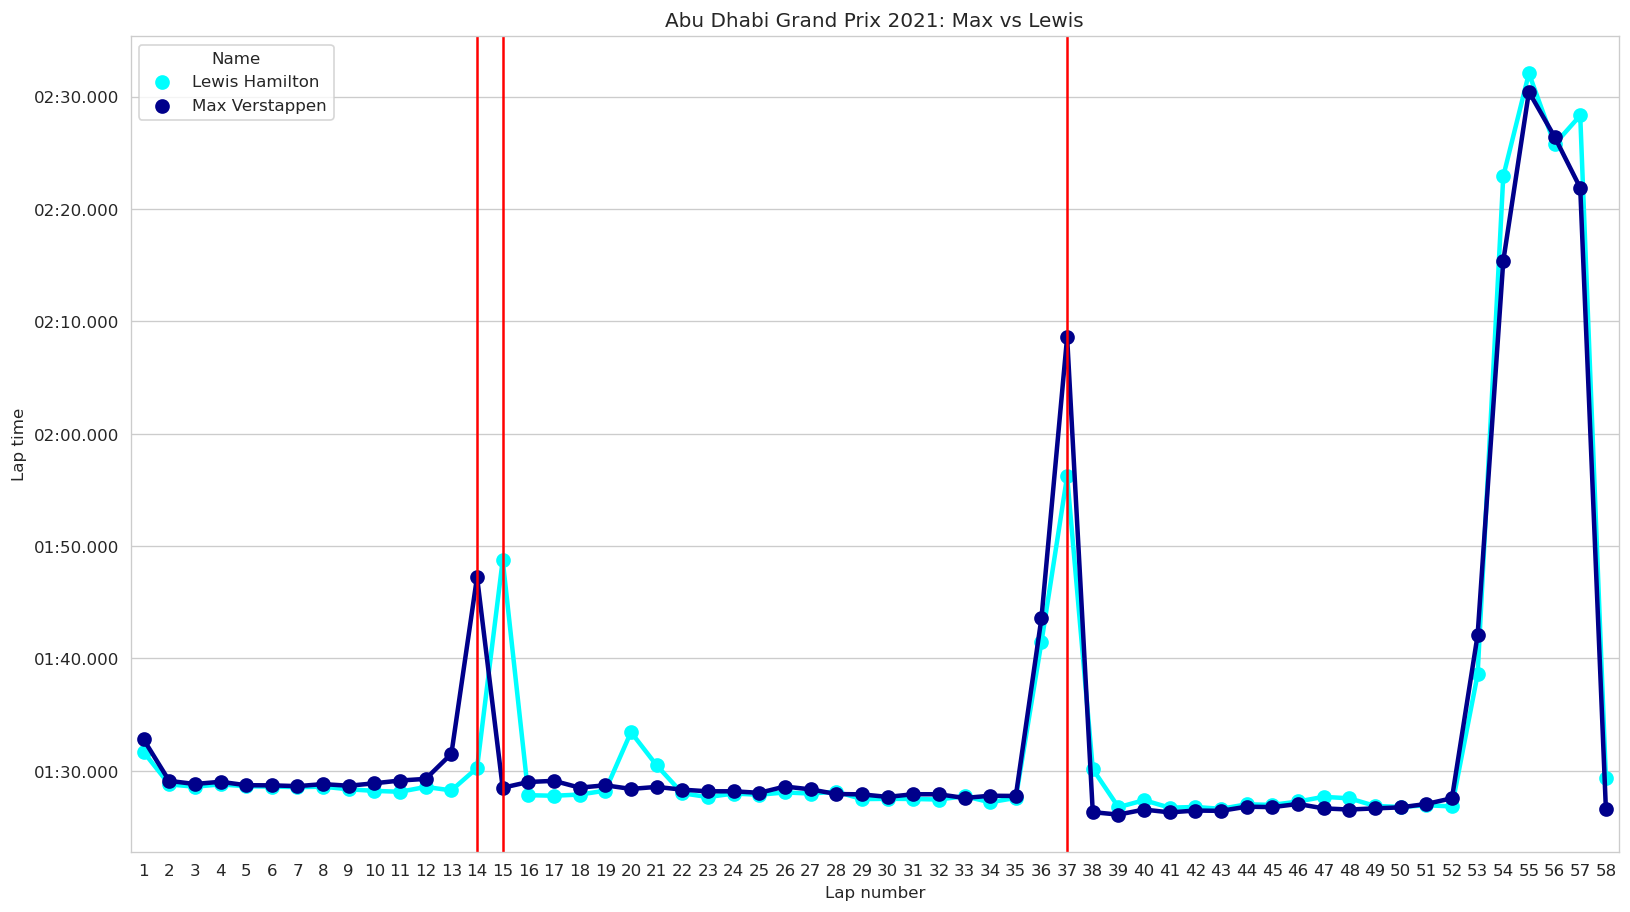

In [91]:
lap_times_df = pd.read_csv("data/lap_times.csv")

# Abu Dhabi Grand Prix 2021
df_line = lap_times_df.loc[lap_times_df["raceId"]==1073]
df_line = df_line[["driverId","time","milliseconds","lap"]]

ham_ver_results = df_line.loc[df_line["driverId"].isin([1,830])]


ham_ver_results.loc[ham_ver_results["driverId"] == 1, "Name"] = "Lewis Hamilton"
ham_ver_results.loc[ham_ver_results["driverId"] == 830, "Name"] = "Max Verstappen"


fig,ax = plt.subplots(figsize=(16, 9), dpi=120)
ax =sns.pointplot(label="1",data=ham_ver_results,x ="lap", y ="milliseconds", hue="Name",palette=["cyan","darkblue"]) 
# ax =sns.pointplot(label="1",data=ver_results,x ="lap", y ="milliseconds",  color = "darkblue")

formatter = matplotlib.ticker.FuncFormatter(lambda ms,_: time.strftime(f'%M:%S.000', time.gmtime(ms/1000)))
ax.yaxis.set_major_formatter(formatter)

ax.axvline(13,c="red")
ax.axvline(14,c="red")
ax.axvline(36,c="red")

ax.set_ylabel("Lap time")
ax.set_xlabel("Lap number")
ax.set_title("Abu Dhabi Grand Prix 2021: Max vs Lewis")
plt.show()


